In [15]:
import numpy as np
import os


os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [16]:
import json


version = '1.0.0'
check_data_version = '1.0.0'


with open(f'../create_dataset/v{check_data_version}/label.json', 'r', encoding='utf-8') as file:
    label = json.load(file)
    
word_count = label['label_count'] * 2 - 1

In [17]:
data_dir = f'../create_dataset/v{check_data_version}/data'
data_files_list = os.listdir(data_dir)


data_files_list.sort()


data = np.concatenate([
    np.load(f'{data_dir}/{file}') for file in data_files_list
], axis=0)
np.shape(data)

(2338, 10, 25)

In [18]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)
print(*labels)

(2338, 10, 24)
(2338,)
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0

In [19]:
from tensorflow.keras.utils import to_categorical
from keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=word_count)
y_data.shape

(2338, 5)

In [20]:
from sklearn.model_selection import train_test_split

time_stamp = 1
x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(2104, 10, 24) (2104, 5)
(234, 10, 24) (234, 5)


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3], return_sequences=False),
    Dense(32, activation='relu'),
    Dense(word_count, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                22784     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 5)                 165       
                                                                 
Total params: 25029 (97.77 KB)
Trainable params: 25029 (97.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
check_data_version = check_data_version.replace('.', '')
version = version.replace('.', '')

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau



history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=150,
    callbacks=[
        ModelCheckpoint(f'../models/data_{check_data_version}_train_{version}_model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/150


59/66 [=========================>....] - ETA: 0s - loss: 17.1494 - acc: 0.6939
Epoch 1: val_acc improved from -inf to 0.98291, saving model to ../models\data_100_train_100_model.h5
66/66 [==============================] - 3s 10ms/step - loss: 15.3912 - acc: 0.7243 - val_loss: 0.0281 - val_acc: 0.9829 - lr: 0.0010
Epoch 2/150
46/66 [===================>..........] - ETA: 0s - loss: 0.0082 - acc: 0.9959

c:\Python\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


61/66 [==========================>...] - ETA: 0s - loss: 0.0063 - acc: 0.9969
Epoch 2: val_acc improved from 0.98291 to 1.00000, saving model to ../models\data_100_train_100_model.h5
66/66 [==============================] - 0s 5ms/step - loss: 0.0059 - acc: 0.9971 - val_loss: 4.1068e-04 - val_acc: 1.0000 - lr: 0.0010
Epoch 3/150
63/66 [===========================>..] - ETA: 0s - loss: 2.9650e-04 - acc: 1.0000
Epoch 3: val_acc did not improve from 1.00000
66/66 [==============================] - 0s 4ms/step - loss: 2.8700e-04 - acc: 1.0000 - val_loss: 1.5110e-04 - val_acc: 1.0000 - lr: 0.0010
Epoch 4/150
58/66 [=========================>....] - ETA: 0s - loss: 1.1134e-04 - acc: 1.0000
Epoch 4: val_acc did not improve from 1.00000
66/66 [==============================] - 0s 4ms/step - loss: 1.0828e-04 - acc: 1.0000 - val_loss: 1.4273e-04 - val_acc: 1.0000 - lr: 0.0010
Epoch 5/150
59/66 [=========================>....] - ETA: 0s - loss: 8.7679e-05 - acc: 1.0000
Epoch 5: val_acc did not im

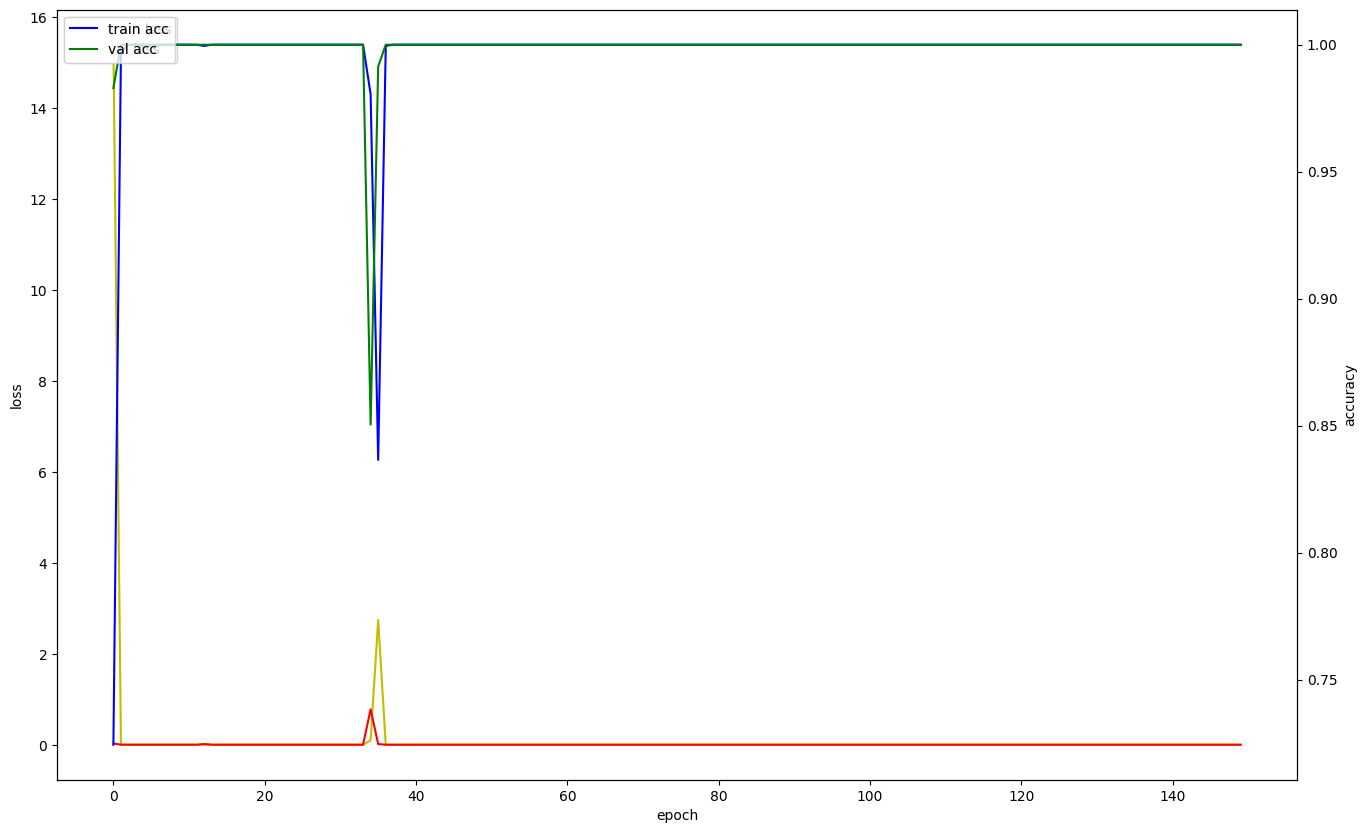

In [24]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.savefig(f'../readme_img/data_{check_data_version}_train_{version}.png')
plt.show()

In [25]:

from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model


model = load_model(f'../models/data_{check_data_version}_train_{version}_model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

8/8 [==============================] - 0s 2ms/step


array([[[183,   0],
        [  0,  51]],

       [[197,   0],
        [  0,  37]],

       [[186,   0],
        [  0,  48]],

       [[193,   0],
        [  0,  41]],

       [[177,   0],
        [  0,  57]]], dtype=int64)